In [206]:
from plantuml import PlantUML  # using 9 Mar, 2023 server version
import numpy as np
import imageio
import matplotlib.pyplot as plt
import yaml
import os
import carreno.viz.vol as viz

In [207]:
# show bigger figures by default
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.dpi'] = 150

# create a server object to call for your computations
png_server = PlantUML(url='http://www.plantuml.com/plantuml/img/',
                      basic_auth={},
                      form_auth={}, http_opts={}, request_opts={})
svg_server = PlantUML(url='http://www.plantuml.com/plantuml/svg/',
                      basic_auth={},
                      form_auth={}, http_opts={}, request_opts={})

# output location
output_folder = ""
path_to_config = ".."
with open(os.path.join(path_to_config, 'config.yml'), 'r') as file:
    infos = yaml.safe_load(file)
    output_folder = os.path.join(path_to_config, infos['BASE']['output'], 'graph')

if not os.path.exists(output_folder):
   os.makedirs(output_folder)
   
print("Output folder :", output_folder)

Output folder : ..\data/output\graph


In [208]:
def render_graph(content):
    img = imageio.imread(png_server.processes(content))
    plt.imshow(img)
    plt.show()

def save_svg_graph(path, content):
    # sadly, doesn't seem to work well with thesis format
    svg = str(svg_server.processes(content), 'UTF-8')
    with open(path, "w") as svg_file:
        svg_file.write(svg)
        print("Saved graph at", path)

def save_png_graph(path, content):
    img = imageio.imread(png_server.processes(content))
    imageio.imwrite(path, img)
    print("Saved graph at", path)

# UNet
Graphs for UNet visualization

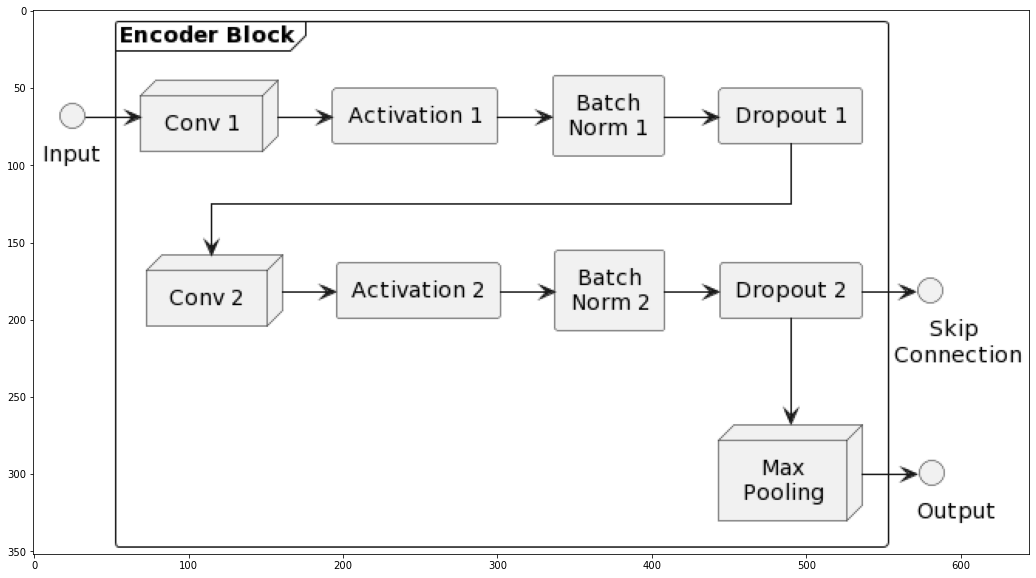

Saved graph at ..\data/output\graph\enc_block.png


In [209]:
# Encoder Block
filename = os.path.join(output_folder, "enc_block.png")
content = """
@startuml
' for straight lines
skinparam linetype ortho
' center text
skinparam defaultTextAlignment center

' components
interface Input
frame "Encoder Block" {
    node      "Conv 1"
    rectangle "Activation 1"
    rectangle "Batch\\nNorm 1"
    rectangle "Dropout 1"
    node      "Conv 2"
    rectangle "Activation 2"
    rectangle "Batch\\nNorm 2"
    rectangle "Dropout 2"
    node      "Max\\nPooling"
}
interface "        Skip\\n         Connection" as skip
interface "        Output" as out

' links
Input            -r-> "Conv 1"
"Conv 1"         -r-> "Activation 1"
"Activation 1"   -r-> "Batch\\nNorm 1"
"Batch\\nNorm 1" -r-> "Dropout 1"
"Dropout 1"      -->  "Conv 2"
"Conv 2"         -r-> "Activation 2"
"Activation 2"   -r-> "Batch\\nNorm 2"
"Batch\\nNorm 2" -r-> "Dropout 2"
"Dropout 2"      -->  "Max\\nPooling"
"Dropout 2"      -r-> skip
"Max\\nPooling"  -r-> out

@enduml
"""
render_graph(content)
save_png_graph(filename, content)

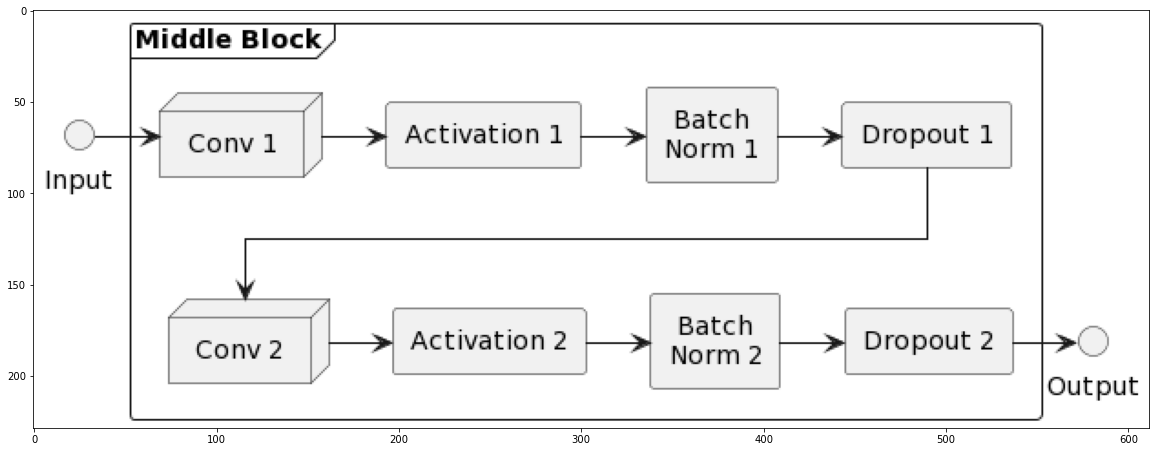

Saved graph at ..\data/output\graph\mid_block.png


In [210]:
# Middle Block
filename = os.path.join(output_folder, "mid_block.png")
content = """
@startuml
' for straight lines
skinparam linetype ortho
' center text
skinparam defaultTextAlignment center

' components
interface Input
frame "Middle Block" {
    node      "Conv 1"
    rectangle "Activation 1"
    rectangle "Batch\\nNorm 1"
    rectangle "Dropout 1"
    node      "Conv 2"
    rectangle "Activation 2"
    rectangle "Batch\\nNorm 2"
    rectangle "Dropout 2"
}
interface "Output"

' links
Input            -r-> "Conv 1"
"Conv 1"         -r-> "Activation 1"
"Activation 1"   -r-> "Batch\\nNorm 1"
"Batch\\nNorm 1" -r-> "Dropout 1"
"Dropout 1"      -->  "Conv 2"
"Conv 2"         -r-> "Activation 2"
"Activation 2"   -r-> "Batch\\nNorm 2"
"Batch\\nNorm 2" -r-> "Dropout 2"
"Dropout 2"      -r-> "Output"

@enduml
"""
render_graph(content)
save_png_graph(filename, content)

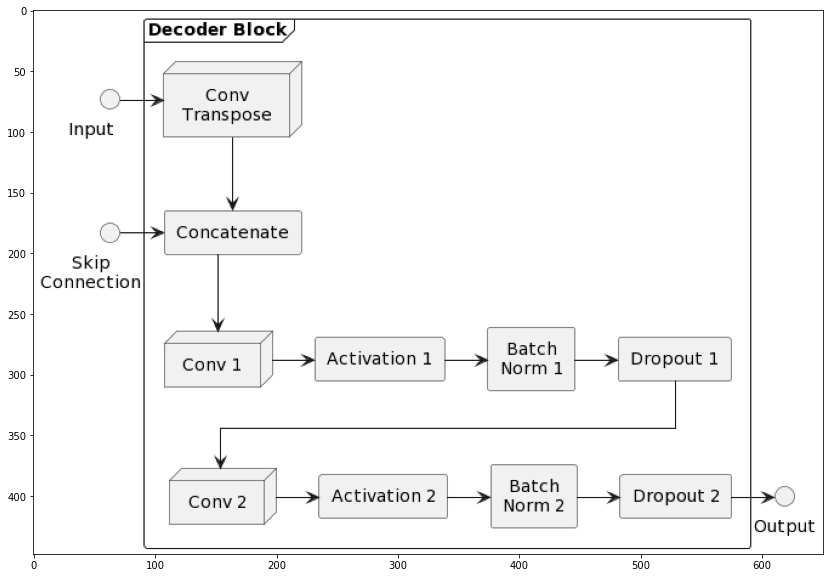

Saved graph at ..\data/output\graph\dec_block.png


In [213]:
# Decoder Block
filename = os.path.join(output_folder, "dec_block.png")
content = """
@startuml
' for straight lines
skinparam linetype ortho
' center text
skinparam defaultTextAlignment center

' components
interface "Skip        \\nConnection        "
interface "Input        "
frame "Decoder Block" {
    node      "Conv\\nTranspose"
    rectangle "Concatenate"
    node      "Conv 1"
    rectangle "Activation 1"
    rectangle "Batch\\nNorm 1"
    rectangle "Dropout 1"
    node      "Conv 2"
    rectangle "Activation 2"
    rectangle "Batch\\nNorm 2"
    rectangle "Dropout 2"
}
interface "Output"

' links
"Input        "                     -r->         "Conv\\nTranspose"
"Input        "                     -d[hidden]-> "Skip        \\nConnection        "
"Conv\\nTranspose"                  -d->         "Concatenate"
"Skip        \\nConnection        " -r->         "Concatenate"
"Concatenate"                       -d->         "Conv 1"
"Conv 1"                            -r->         "Activation 1"
"Activation 1"                      -r->         "Batch\\nNorm 1"
"Batch\\nNorm 1"                    -r->         "Dropout 1"
"Dropout 1"                         -->          "Conv 2"
"Conv 2"                            -r->         "Activation 2"
"Activation 2"                      -r->         "Batch\\nNorm 2"
"Batch\\nNorm 2"                    -r->         "Dropout 2"
"Dropout 2"                         -r->         "Output"

@enduml
"""
render_graph(content)
save_png_graph(filename, content)

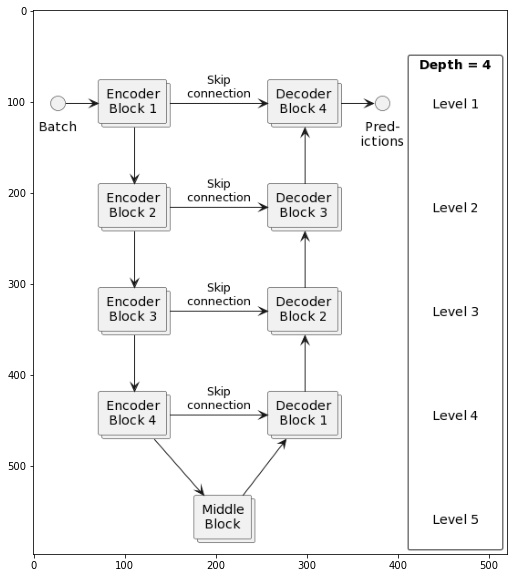

Saved graph at ..\data/output\graph\unet_arch.png


In [212]:
# Overall Architecture
filename = os.path.join(output_folder, "unet_arch.png")
content = """
@startuml
' for straight lines
' center text
skinparam defaultTextAlignment center

' components
interface  "Batch"
collections "Encoder\\nBlock 1"
collections "Encoder\\nBlock 2"
collections "Encoder\\nBlock 3"
collections "Encoder\\nBlock 4"
collections "Middle\\nBlock"
collections "Decoder\\nBlock 1"
collections "Decoder\\nBlock 2"
collections "Decoder\\nBlock 3"
collections "Decoder\\nBlock 4"
interface   "Pred-\\nictions" as pred
interface   "Dummy1" as d1
interface   "Dummy2" as d2
interface   "Dummy3" as d3
interface   "Dummy3" as d4
interface   "Dummy3" as d5
rectangle "Depth = 4" {
    label       "Level 1"
    label       "Level 2"
    label       "Level 3"
    label       "Level 4"
    label       "Level 5"
}

' links
"Batch"             -r-> "Encoder\\nBlock 1"
"Encoder\\nBlock 1" -d-> "Encoder\\nBlock 2"
"Encoder\\nBlock 2" -d-> "Encoder\\nBlock 3"
"Encoder\\nBlock 3" -d-> "Encoder\\nBlock 4"

"Encoder\\nBlock 1" -r-> "Decoder\\nBlock 4" : "Skip\\nconnection"
"Encoder\\nBlock 2" -r-> "Decoder\\nBlock 3" : "Skip\\nconnection"
"Encoder\\nBlock 3" -r-> "Decoder\\nBlock 2" : "Skip\\nconnection"
"Encoder\\nBlock 4" -r-> "Decoder\\nBlock 1" : "Skip\\nconnection"

"Encoder\\nBlock 4" -d-> d4
d4                  -r-> "Middle\\nBlock"
"Middle\\nBlock"    -r-> d5
d5                  -u-> "Decoder\\nBlock 1"

"Encoder\\nBlock 4" -d-> "Middle\\nBlock"
"Middle\\nBlock"    -u-> "Decoder\\nBlock 1"

"Decoder\\nBlock 1" -u-> "Decoder\\nBlock 2"
"Decoder\\nBlock 2" -u-> "Decoder\\nBlock 3"
"Decoder\\nBlock 3" -u-> "Decoder\\nBlock 4"

"Decoder\\nBlock 1" -r[hidden]-> d1
"Decoder\\nBlock 2" -r[hidden]-> d2
"Decoder\\nBlock 3" -r[hidden]-> d3
"Decoder\\nBlock 4" -r-> pred

"Level 1"           -d[hidden]-> "Level 2"
"Level 2"           -d[hidden]-> "Level 3"
"Level 3"           -d[hidden]-> "Level 4"
"Level 4"           -d[hidden]-> "Level 5"

"Level 1" -l[hidden]-> "Batch"
"Level 1" -l[hidden]-> "Encoder\\nBlock 1"
"Level 2" -l[hidden]-> "Encoder\\nBlock 2"
"Level 3" -l[hidden]-> "Encoder\\nBlock 3"

hide d1
hide d2
hide d3
hide d4
hide d5
@enduml
"""
render_graph(content)
save_png_graph(filename, content)